### Business Understanding

Persetujuan pinjaman penting bagi lembaga keuangan karena memengaruhi risiko, profitabilitas, dan kepuasan pelanggan. Persetujuan pinjaman berisiko tinggi meningkatkan gagal bayar, sementara penolakan peminjam layak mengurangi peluang pendapatan.  

Analisis ini bertujuan membangun model klasifikasi untuk memprediksi *loan_status* (resiko rendah = 0, resiko sedang = 1, resiko tinggi = 2) berdasarkan atribut pemohon seperti demografi, finansial, dan riwayat kredit. Model ini membantu lembaga keuangan mengevaluasi kelayakan kredit dengan cepat dan akurat.

#### Data Preparation

Membaca Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd

df = pd.read_csv("loan_data.csv")

df.head(10)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
5,21.0,female,High School,12951.0,0,OWN,2500.0,VENTURE,7.14,0.19,2.0,532,No,1
6,26.0,female,Bachelor,93471.0,1,RENT,35000.0,EDUCATION,12.42,0.37,3.0,701,No,1
7,24.0,female,High School,95550.0,5,RENT,35000.0,MEDICAL,11.11,0.37,4.0,585,No,1
8,24.0,female,Associate,100684.0,3,RENT,35000.0,PERSONAL,8.90,0.35,2.0,544,No,1
9,21.0,female,High School,12739.0,0,OWN,1600.0,VENTURE,14.74,0.13,3.0,640,No,1


Menelaah data

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [3]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


Analisis Ekplorasi Data (Selain numerik)

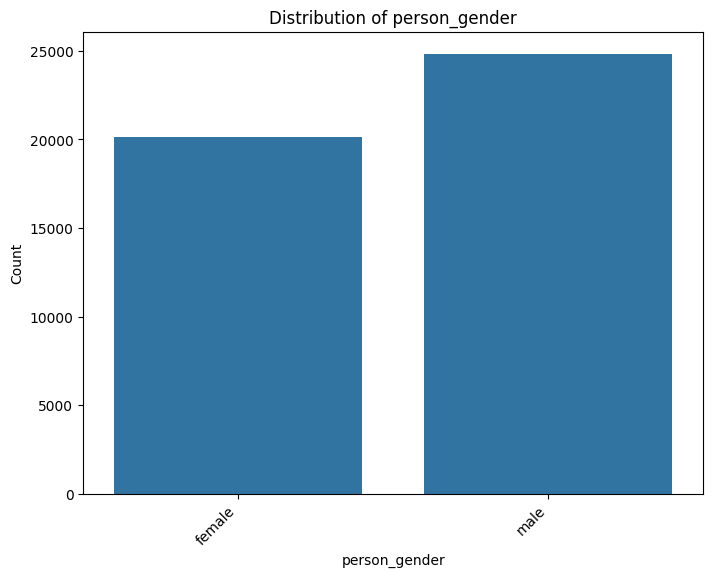

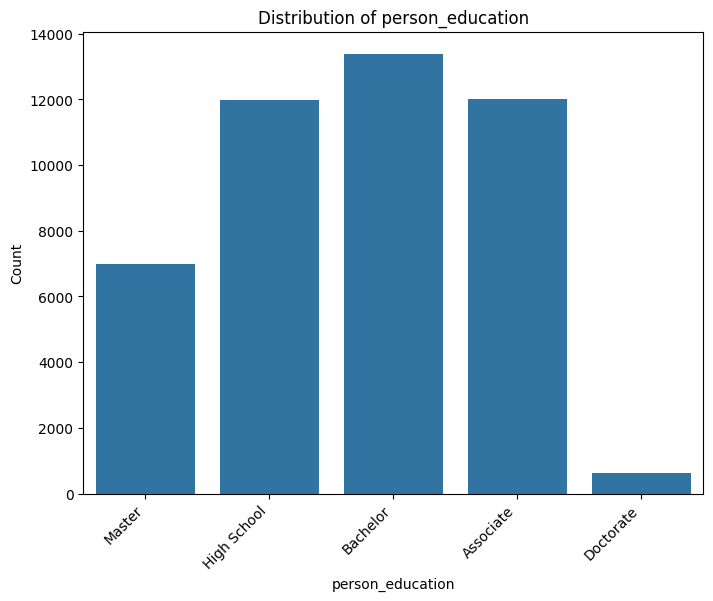

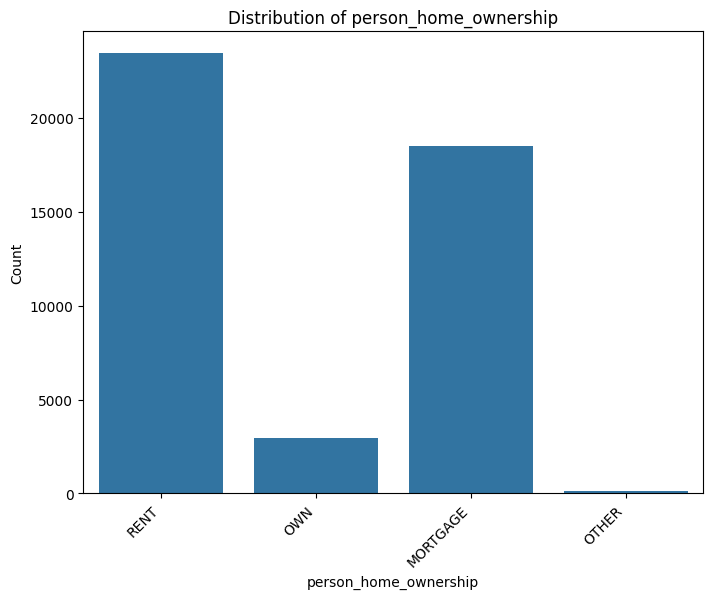

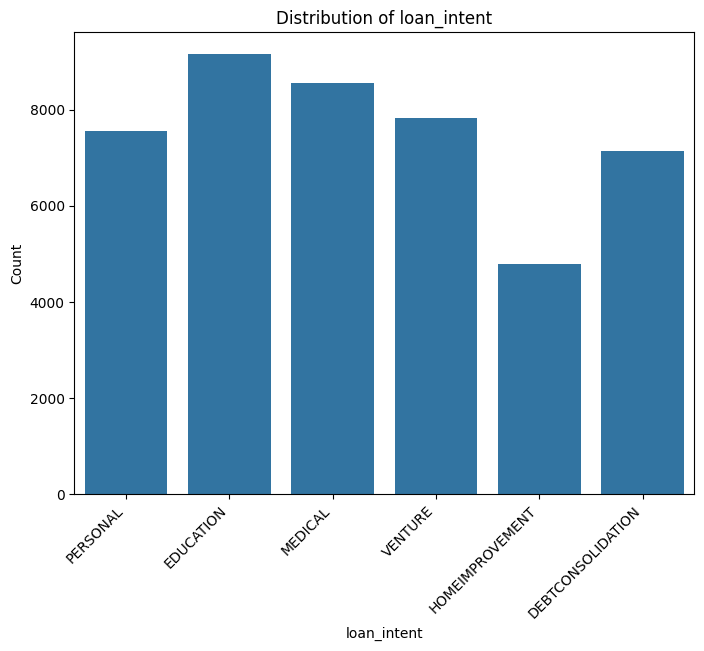

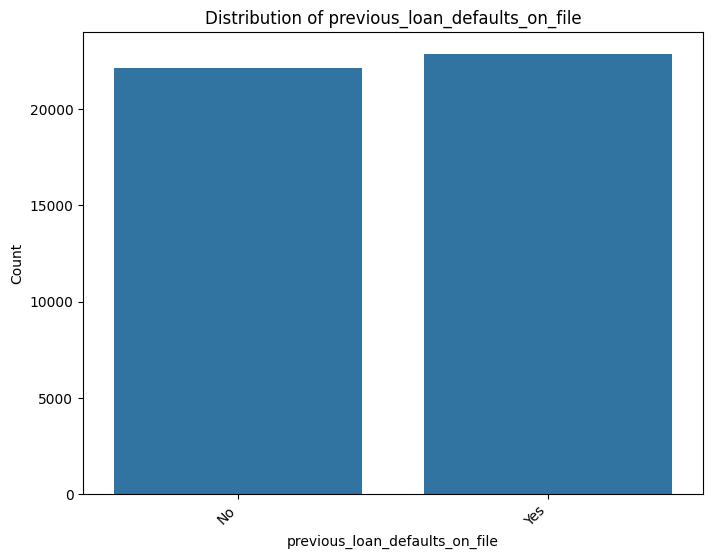

In [4]:
categorical_cols = df.select_dtypes(exclude=['number']).columns

for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.show()

### Person_Gender
- Dominasi Laki-laki: Data menunjukkan bahwa jumlah individu dengan gender "laki-laki" secara signifikan lebih banyak dibandingkan dengan individu dengan gender "perempuan" dalam dataset ini.
- Ketidakseimbangan Gender: Terdapat ketidakseimbangan gender yang cukup mencolok dalam data. Ini mengindikasikan adanya bias gender dalam sampel data.
### Person_Education
- Dominasi Tingkat Sarjana (Bachelor): Tingkat pendidikan yang paling banyak dimiliki oleh individu dalam dataset ini adalah Sarjana (Bachelor). Hal ini ditunjukkan oleh batang paling tinggi pada grafik.
- Tingkat SMA Populer: Tingkat pendidikan SMA juga memiliki jumlah yang cukup signifikan, menempati posisi kedua setelah Sarjana.
- Pendidikan Pascasarjana Lebih Sedikit: Tingkat pendidikan Master dan Doktorate memiliki jumlah yang jauh lebih sedikit dibandingkan dengan Sarjana dan SMA.
- Pendidikan Associate: Tingkat pendidikan Associate memiliki jumlah yang cukup besar, berada di antara Sarjana dan SMA.
### Person_Home_Ownership
- Dominasi Penyewa (Rent): Sebagian besar individu dalam dataset ini berstatus sebagai penyewa (rent). Hal ini ditunjukkan oleh batang paling tinggi pada grafik.
- Pemilik Rumah dengan KPR Cukup Besar: Jumlah individu yang memiliki rumah dengan KPR (mortgage) juga cukup signifikan, menempati posisi kedua setelah penyewa.
- Pemilik Rumah Tanpa KPR Lebih Sedikit: Jumlah individu yang memiliki rumah tanpa KPR (own) lebih sedikit dibandingkan dengan penyewa dan pemilik rumah dengan KPR.
- Kategori "Other" Sangat Kecil: Kategori "other" memiliki jumlah yang sangat sedikit, menunjukkan bahwa sebagian besar data tercakup dalam tiga kategori utama (rent, own, mortgage).
### Loan_Intent
- Dominasi Pendidikan dan Usaha: Tujuan pinjaman yang paling banyak adalah untuk pendidikan (education) dan usaha (venture). Ini menunjukkan bahwa banyak individu yang meminjam uang untuk meningkatkan kualitas hidup mereka atau mengembangkan bisnis.
- Kesehatan Juga Penting: Tujuan pinjaman untuk keperluan medis (medical) juga cukup signifikan, menunjukkan bahwa kebutuhan kesehatan menjadi salah satu alasan utama orang meminjam uang.
- Konsolidasi Utang dan Renovasi Rumah: Tujuan pinjaman untuk konsolidasi utang (debt consolidation) dan renovasi rumah (home improvement) memiliki jumlah yang cukup, menunjukkan bahwa banyak orang menggunakan pinjaman untuk mengelola utang yang ada atau meningkatkan nilai aset properti mereka.
- Tujuan Pribadi: Tujuan pinjaman pribadi (personal) juga cukup banyak, menunjukkan bahwa pinjaman juga digunakan untuk berbagai keperluan pribadi lainnya yang tidak termasuk dalam kategori di atas.
### previous_loan_default_on_file
- Jumlah yang Hampir Sama: Grafik menunjukkan bahwa jumlah individu yang memiliki riwayat tunggakan pinjaman sebelumnya ("Yes") hampir sama dengan jumlah individu yang tidak memiliki riwayat tunggakan ("No").
- Tidak Ada Dominasi: Tidak ada kategori yang secara signifikan mendominasi, menunjukkan bahwa masalah tunggakan pinjaman cukup merata di antara individu dalam dataset ini.

Analisis Eksplorasi Data (Numerik)

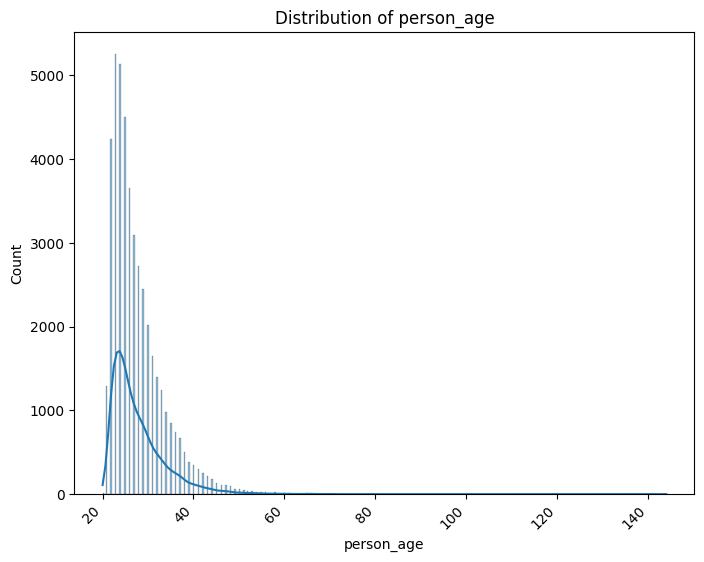

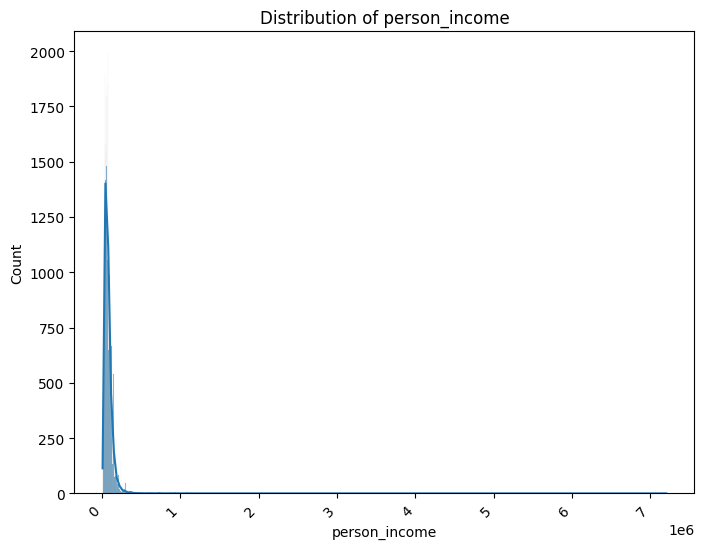

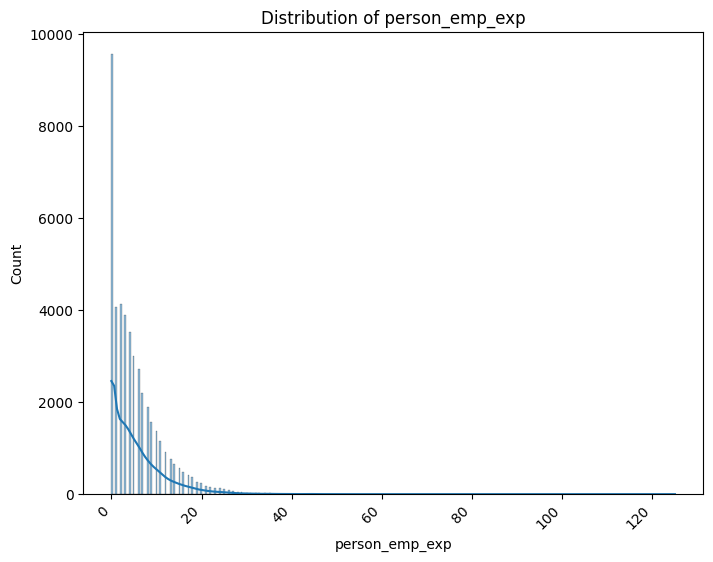

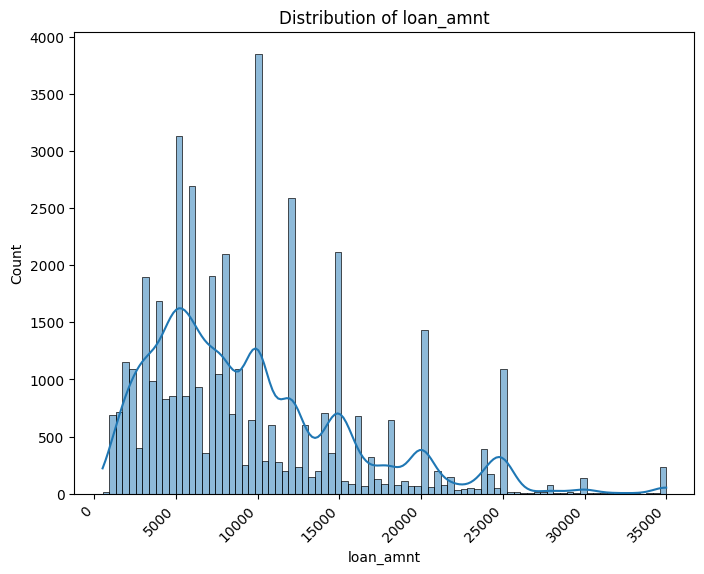

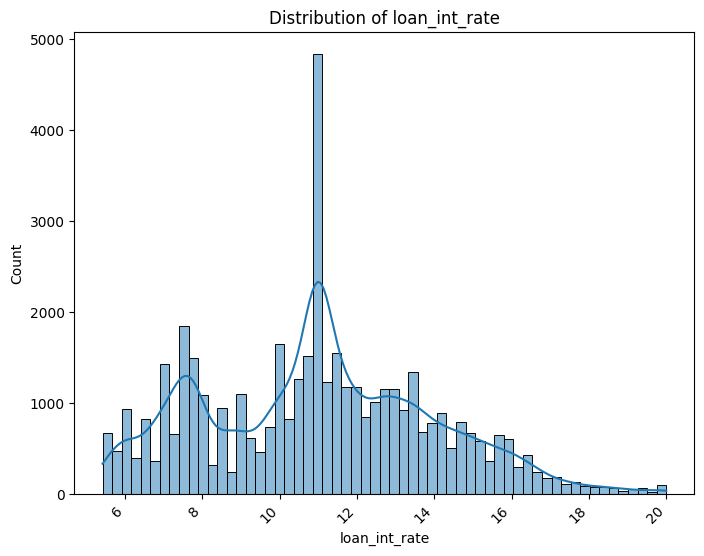

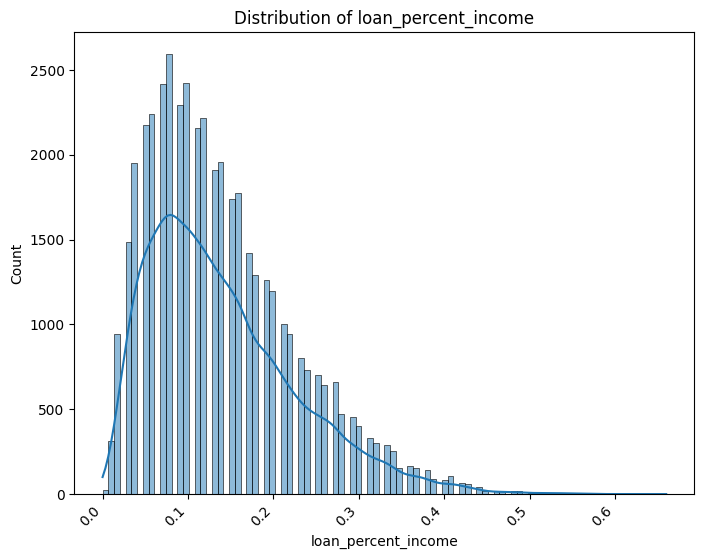

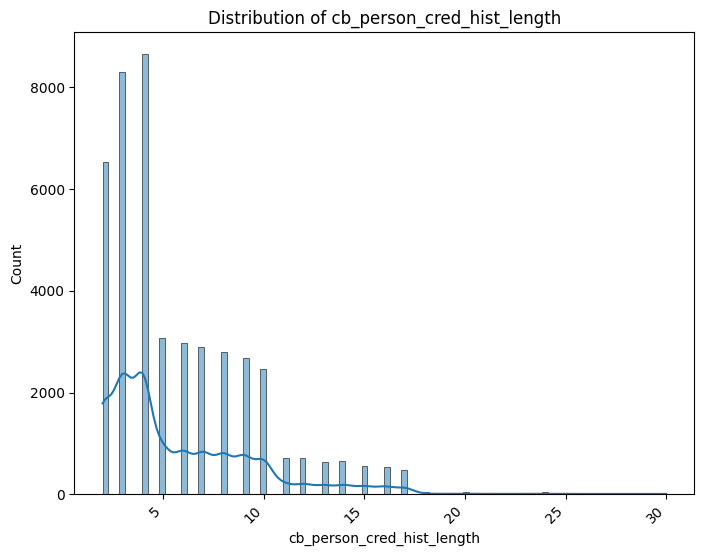

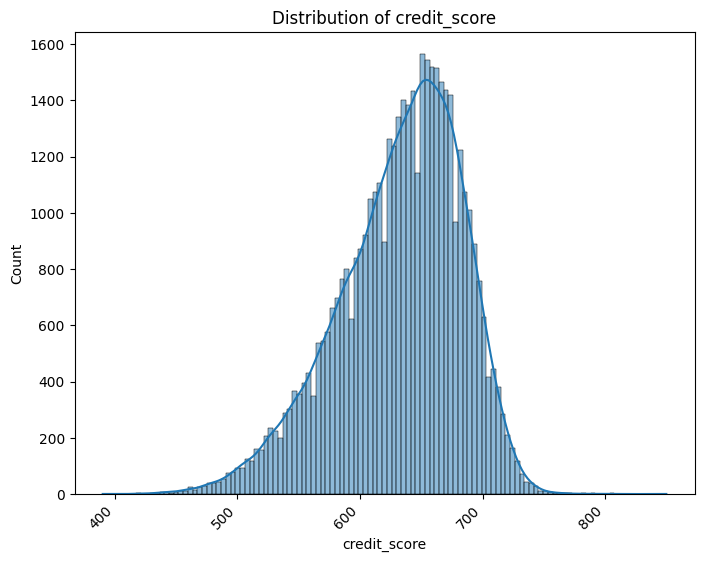

In [5]:
numerical_cols = df.select_dtypes(include=['number']).drop('loan_status', axis=1).columns

for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.show()

- Mengeksplorasi Distribusi Data Numerik:Melihat pola distribusi setiap kolom numerik (apakah data mengikuti distribusi normal, skewed, atau multimodal).
- Mengidentifikasi Outlier:Histogram dapat membantu mendeteksi nilai yang sangat jauh dari mayoritas data (outlier).
- Membantu Persiapan Data untuk Model: Hasil analisis ini dapat menentukan apakah perlu dilakukan normalisasi, transformasi log, atau teknik lainnya untuk memperbaiki distribusi data.

Visualisasi proporsi status

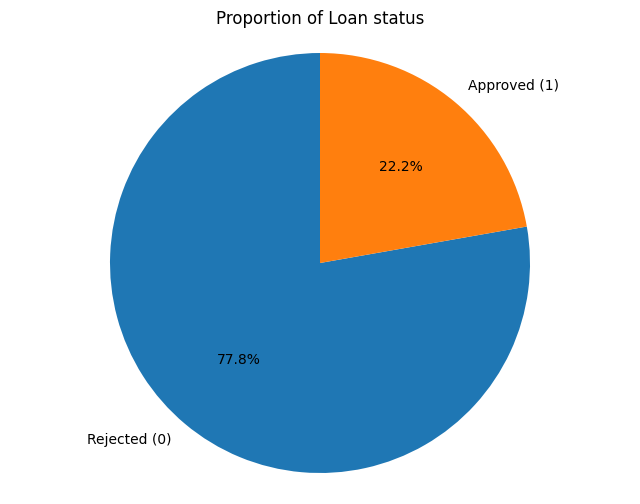

In [6]:
loan_status_counts = df['loan_status'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(loan_status_counts, labels=['Rejected (0)', 'Approved (1)'], autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Loan status')
plt.axis('equal')
plt.show()

Mengecek missing value (nilai null)

In [7]:
df.isnull().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

Mengecek duplikat data

In [8]:
df.duplicated().sum()

np.int64(0)

Mengecek Outliers menggunakan boxplot

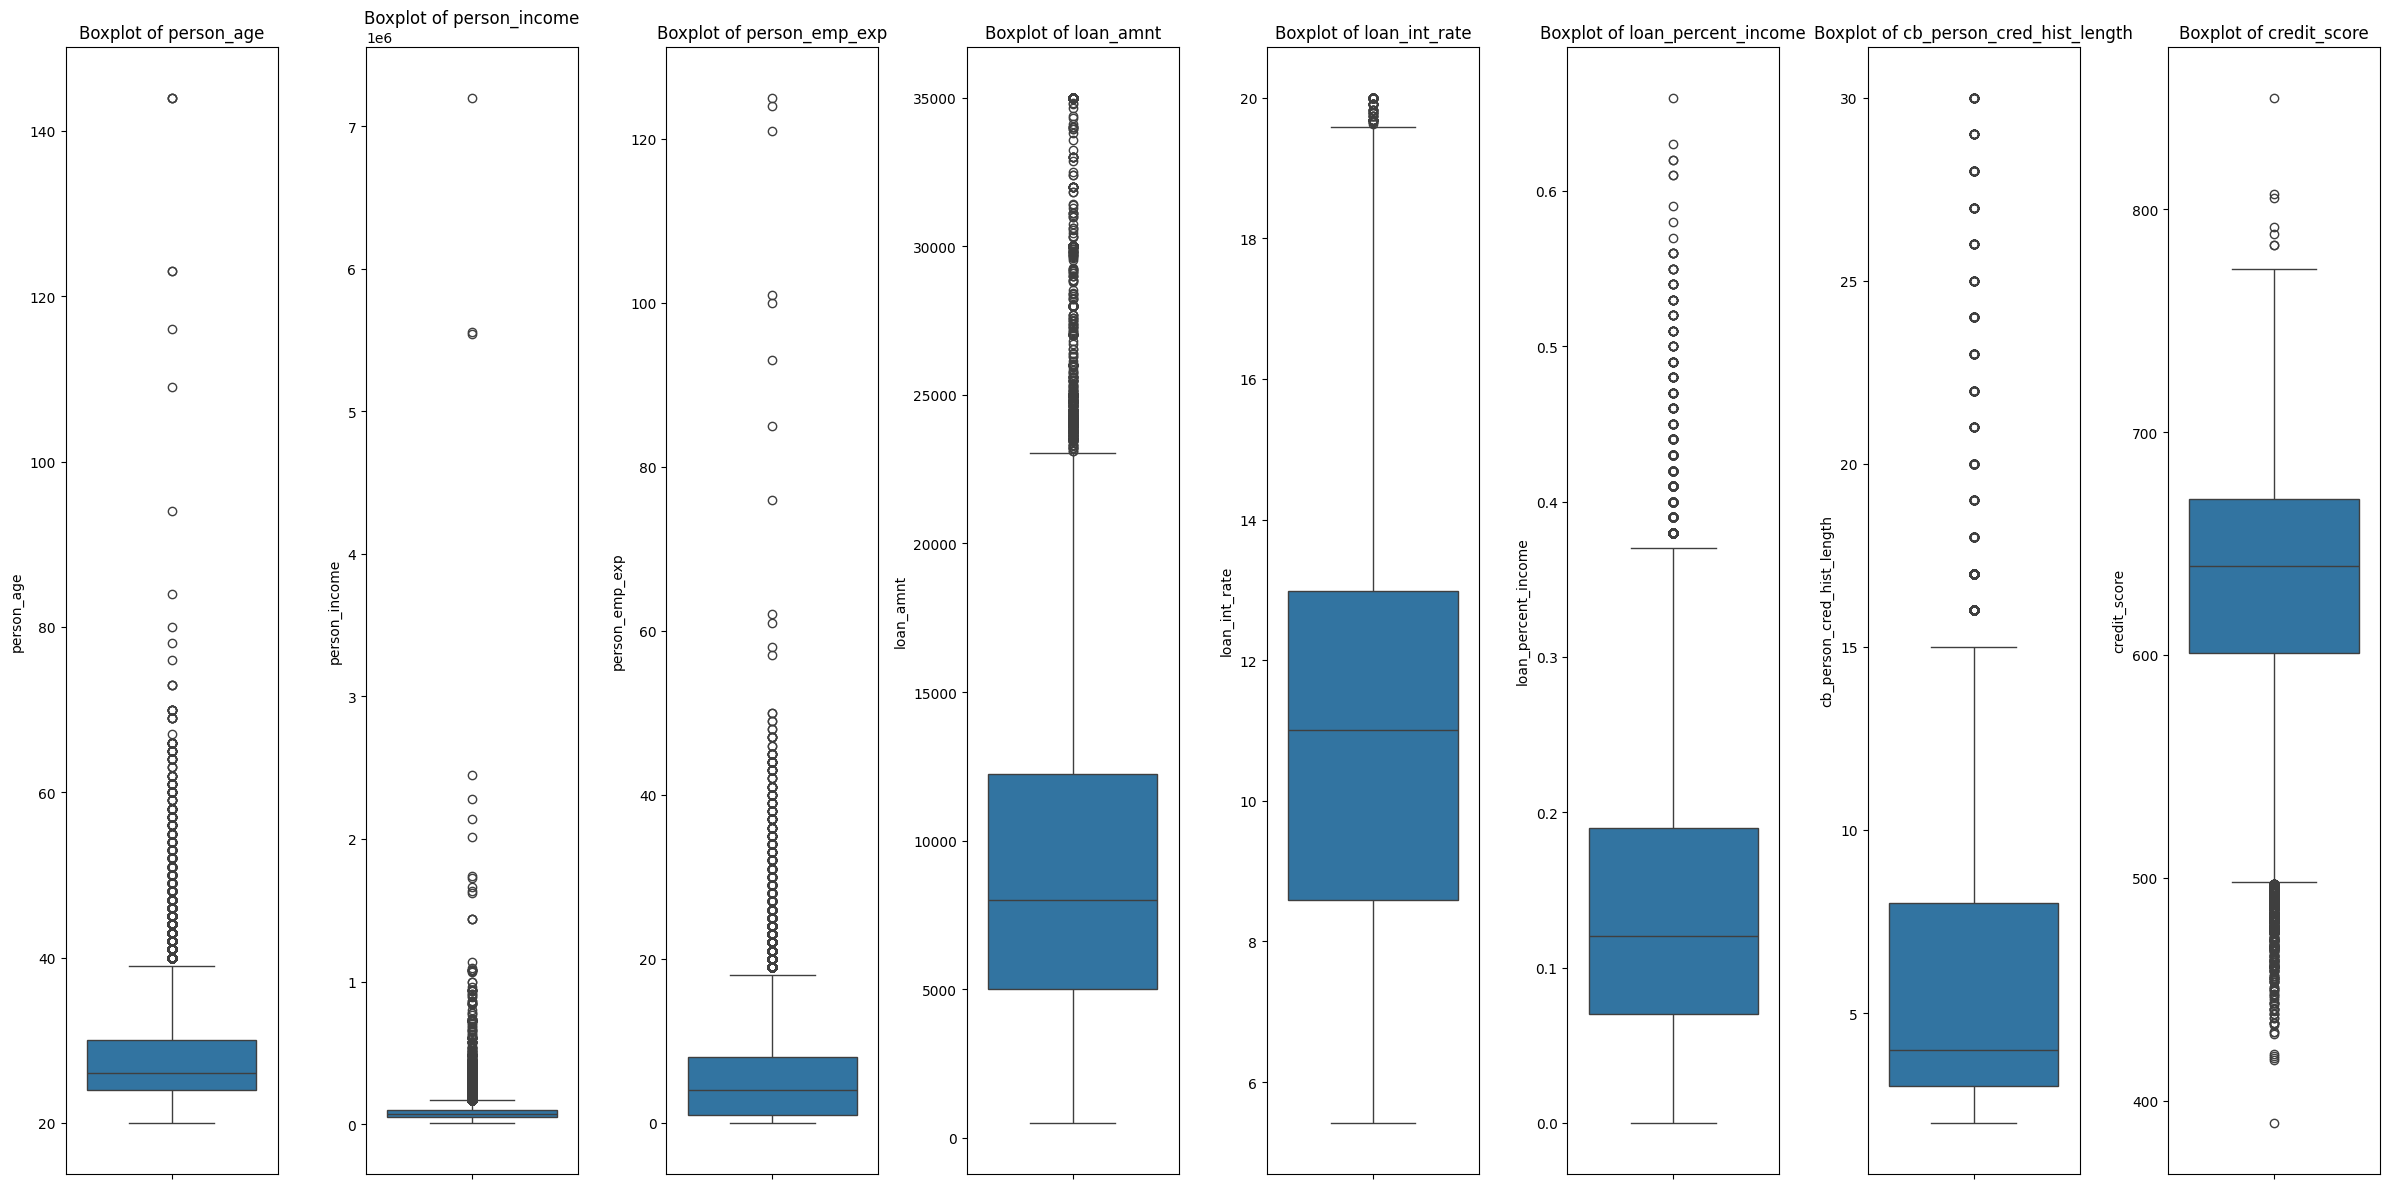

In [9]:
plt.figure(figsize=(len(numerical_cols) * 3, 12))

for i, column in enumerate(numerical_cols, 1):
    plt.subplot(1, len(numerical_cols), i)
    sns.boxplot(data=df, y=column)
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

#### Membersihkan Data

Menghapus outliers (IQR)

In [10]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    initial_count = df.shape[0]
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    final_count = df.shape[0]
    return df, initial_count != final_count

columns_to_clean = numerical_cols

outliers_removed = True
while outliers_removed:
    outliers_removed = False
    for col in columns_to_clean:
        df, removed = remove_outliers_iqr(df, col)
        if removed:
            outliers_removed = True

Mengecek kembali outlier

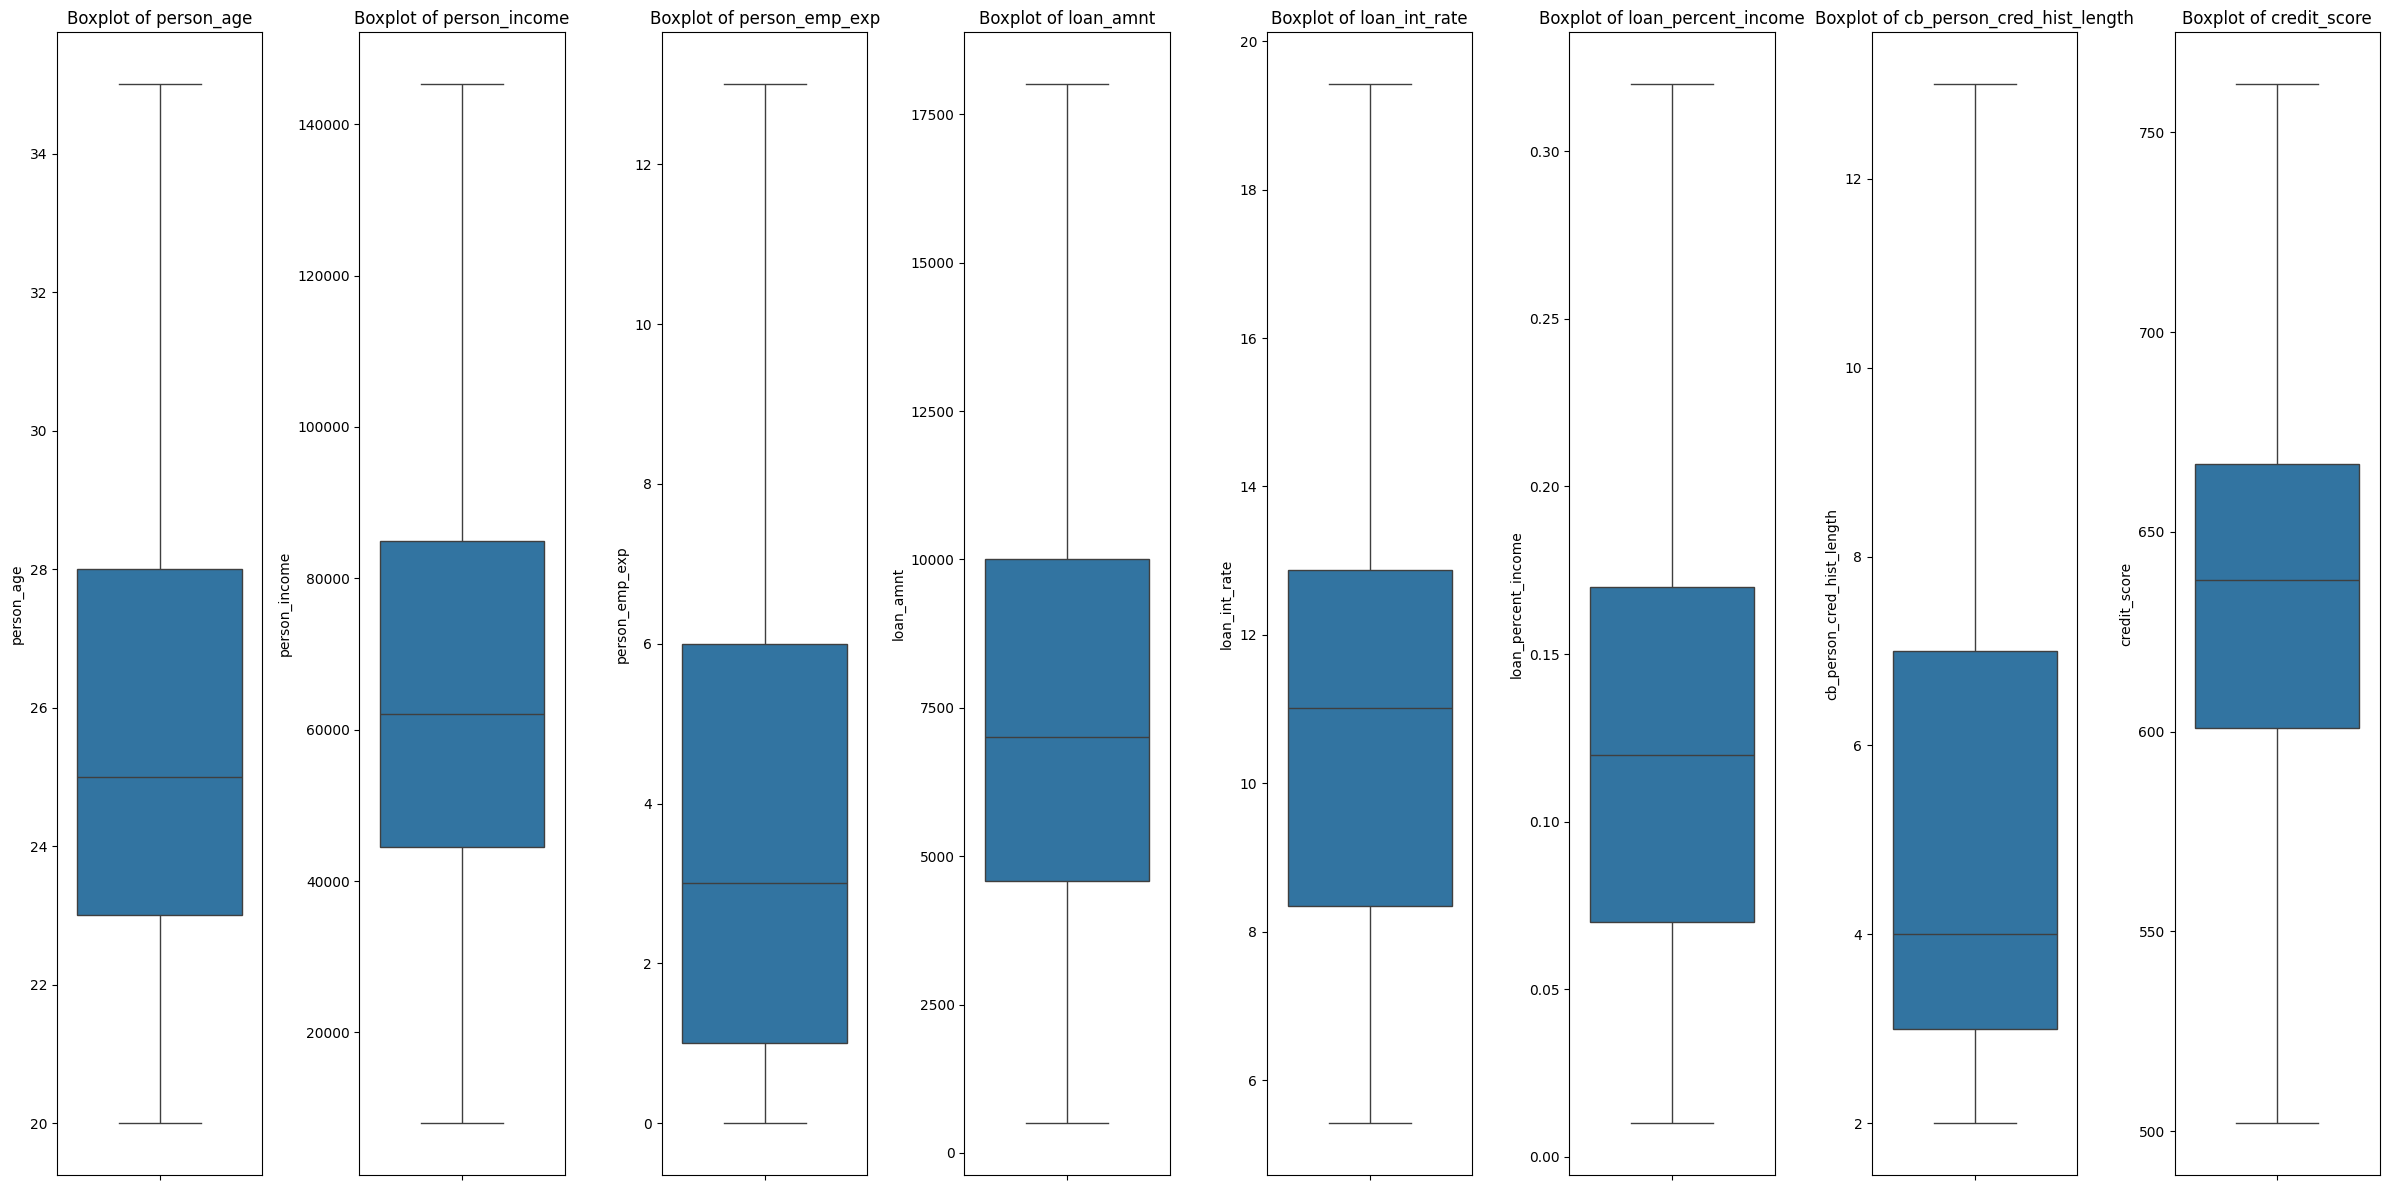

In [11]:
plt.figure(figsize=(len(numerical_cols) * 3, 12))

for i, column in enumerate(numerical_cols, 1):
    plt.subplot(1, len(numerical_cols), i)
    sns.boxplot(data=df, y=column)
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

Transfomasi nilai data menjadi numerik

In [12]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']

le = LabelEncoder()

for col in categorical_cols:
    df[col] = df[col].astype(str)
    df[col] = le.fit_transform(df[col])

df.dtypes

person_age                        float64
person_gender                       int64
person_education                    int64
person_income                     float64
person_emp_exp                      int64
person_home_ownership               int64
loan_amnt                         float64
loan_intent                         int64
loan_int_rate                     float64
loan_percent_income               float64
cb_person_cred_hist_length        float64
credit_score                        int64
previous_loan_defaults_on_file      int64
loan_status                         int64
dtype: object

In [13]:
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

Membagi dataset

In [14]:
X = df.drop('loan_status', axis=1)
y = df['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### memahami hubungan antar variable secara umum

Menggunakan Heatmap

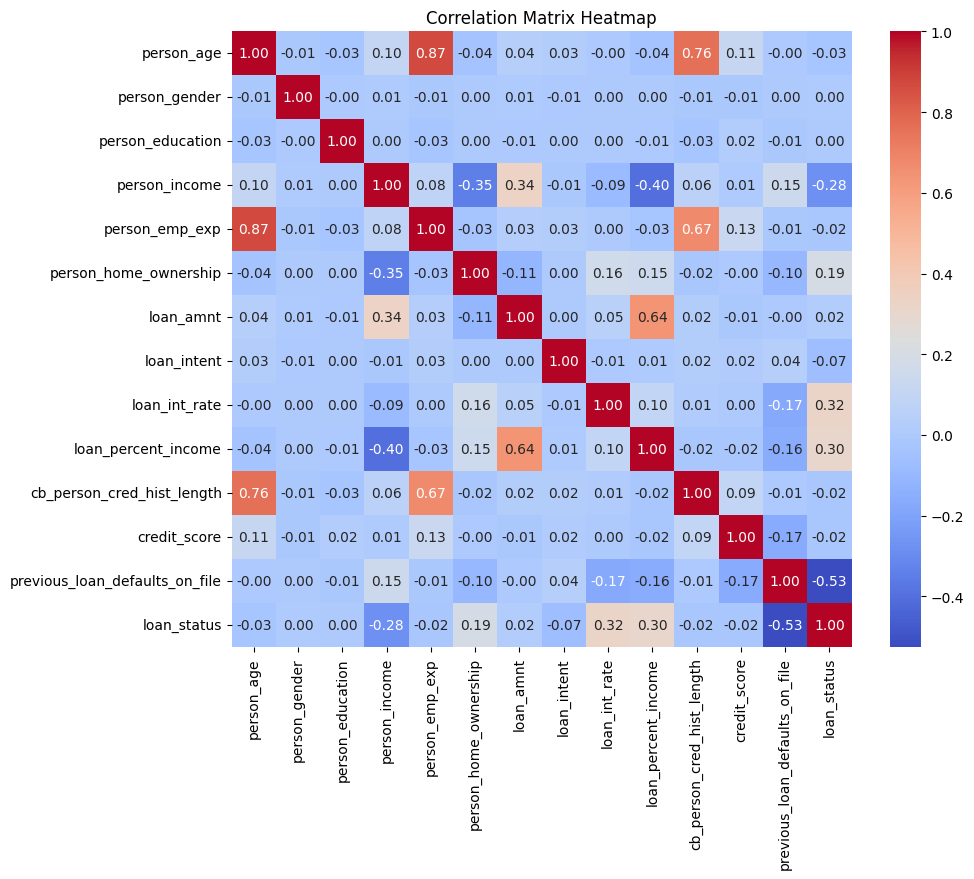

In [15]:
# Pilih hanya kolom numerik dari DataFrame
numeric_df = df.select_dtypes(include=['number'])

# Hitung matriks korelasi
correlation_matrix = numeric_df.corr()

# Visualisasi Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

# Hitung korelasi dengan loan_status
correlation_with_loan_status = df.corr()['loan_status']

# Ambil 5 fitur teratas dengan korelasi terkuat
top_5_correlations_matrix = correlation_with_loan_status.drop('loan_status').abs().sort_values(ascending=False).head(5).index.tolist()


Menggunakan xgb

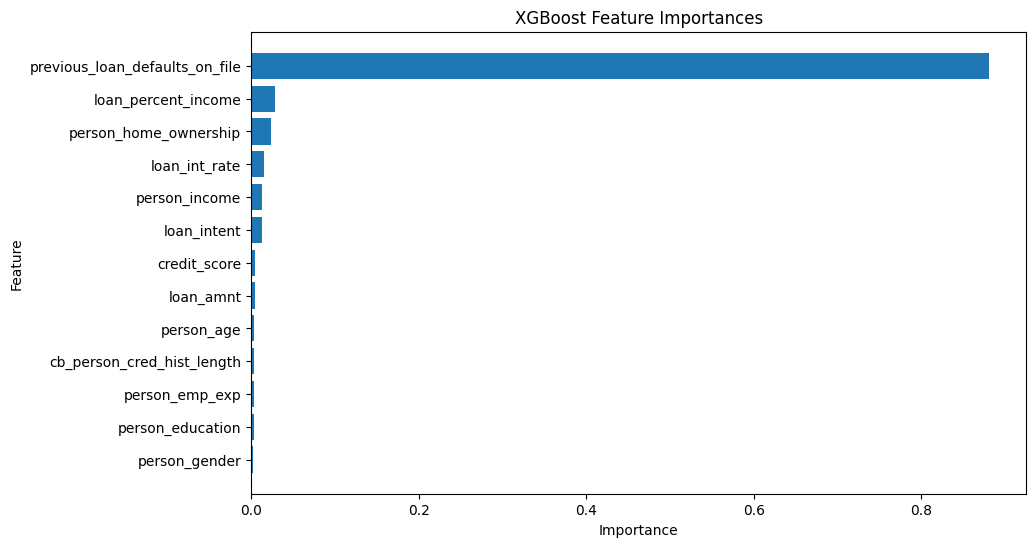

In [16]:
model = xgb.XGBClassifier(random_state=42)
model.fit(X_train, y_train)
xgb_importance = model.feature_importances_

xgb_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': xgb_importance})
xgb_importance_df = xgb_importance_df.sort_values(by='Importance', ascending=False)
top_xgb_features = xgb_importance_df['Feature'].head(5).tolist()

plt.figure(figsize=(10, 6))
plt.barh(xgb_importance_df['Feature'], xgb_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('XGBoost Feature Importances')
plt.gca().invert_yaxis()
plt.show()

menampilkan 5 varible teratas yang memiliki hubungan kuat dengan variable target (loan_status)

In [17]:
print("Top Features from Correlation:")
print(top_5_correlations_matrix)
print("\nTop Features from XGBoost:")
print(top_xgb_features)

Top Features from Correlation:
['previous_loan_defaults_on_file', 'loan_int_rate', 'loan_percent_income', 'person_income', 'person_home_ownership']

Top Features from XGBoost:
['previous_loan_defaults_on_file', 'loan_percent_income', 'person_home_ownership', 'loan_int_rate', 'person_income']


"Tertinggi" dalam analisis korelasi mengacu pada nilai absolut (tanpa tanda) dari korelasi. Nilai korelasi bisa positif atau negatif, tetapi keduanya sama-sama menunjukkan hubungan kuat antara variabel.
- previous_loan_defaults_on_file memiliki nilai tertinggi yaitu -0.53 tetapi bernilai negatif

Menggabungkan variable yang memiliki korelasi tertinggi dari 2 metode

In [18]:
top_features = list(set(top_5_correlations_matrix + top_xgb_features))
print("Top Features from Correlation, XGBoost:")
print(top_features)


Top Features from Correlation, XGBoost:
['loan_percent_income', 'loan_int_rate', 'previous_loan_defaults_on_file', 'person_income', 'person_home_ownership']


#### Konstruksi Data

In [19]:
df.head(10)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
1,21.0,0,3,12282.0,0,2,1000.0,1,11.14,0.08,2.0,504,1,0
5,21.0,0,3,12951.0,0,2,2500.0,5,7.14,0.19,2.0,532,0,1
9,21.0,0,3,12739.0,0,2,1600.0,5,14.74,0.13,3.0,640,0,1
19,24.0,0,4,14283.0,1,0,1750.0,1,10.99,0.12,2.0,679,0,1
23,24.0,0,1,13866.0,0,2,1500.0,4,7.29,0.11,3.0,600,1,0
26,21.0,0,0,14288.0,0,0,4575.0,5,17.74,0.32,3.0,626,0,1
27,23.0,1,3,14293.0,0,2,1400.0,4,9.32,0.10,3.0,607,0,0
29,21.0,0,1,14988.0,0,1,4000.0,1,12.84,0.27,2.0,553,0,1
30,21.0,1,3,14858.0,0,2,2000.0,3,11.12,0.13,3.0,589,0,1
35,21.0,1,0,15150.0,0,2,2500.0,1,7.51,0.17,4.0,600,0,1


In [20]:
df.describe()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
count,32616.000000,32616.000000,32616.000000,32616.000000,32616.000000,32616.000000,32616.000000,32616.000000,32616.000000,32616.000000,32616.000000,32616.000000,32616.000000,32616.000000
mean,26.046388,0.547247,1.745248,66911.374601,3.714189,1.791605,7693.534155,2.513061,10.827659,0.127043,4.801079,631.797737,0.525601,0.199902
std,3.495920,0.497770,1.478740,28754.917383,3.485507,1.424373,4131.238545,1.727526,2.920495,0.069706,2.457946,47.116223,0.499352,0.399933
min,20.000000,0.000000,0.000000,8000.000000,0.000000,0.000000,500.000000,0.000000,5.420000,0.010000,2.000000,502.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,44520.250000,1.000000,0.000000,4581.500000,1.000000,8.350000,0.070000,3.000000,601.000000,0.000000,0.000000
50%,25.000000,1.000000,1.000000,62052.500000,3.000000,3.000000,7000.000000,3.000000,11.010000,0.120000,4.000000,638.000000,1.000000,0.000000
75%,28.000000,1.000000,3.000000,84959.750000,6.000000,3.000000,10000.000000,4.000000,12.870000,0.170000,7.000000,667.000000,1.000000,0.000000
max,35.000000,1.000000,4.000000,145287.000000,13.000000,3.000000,18007.000000,5.000000,19.420000,0.320000,13.000000,762.000000,1.000000,1.000000


Normalisasi Data

In [21]:
from sklearn.preprocessing import StandardScaler

# Pilih hanya kolom numerik untuk K-Means
numerical_cols = df.select_dtypes(include=['number']).drop('loan_status', axis=1).columns

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numerical_cols])


In [22]:
df.describe()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
count,32616.000000,32616.000000,32616.000000,32616.000000,32616.000000,32616.000000,32616.000000,32616.000000,32616.000000,32616.000000,32616.000000,32616.000000,32616.000000,32616.000000
mean,26.046388,0.547247,1.745248,66911.374601,3.714189,1.791605,7693.534155,2.513061,10.827659,0.127043,4.801079,631.797737,0.525601,0.199902
std,3.495920,0.497770,1.478740,28754.917383,3.485507,1.424373,4131.238545,1.727526,2.920495,0.069706,2.457946,47.116223,0.499352,0.399933
min,20.000000,0.000000,0.000000,8000.000000,0.000000,0.000000,500.000000,0.000000,5.420000,0.010000,2.000000,502.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,44520.250000,1.000000,0.000000,4581.500000,1.000000,8.350000,0.070000,3.000000,601.000000,0.000000,0.000000
50%,25.000000,1.000000,1.000000,62052.500000,3.000000,3.000000,7000.000000,3.000000,11.010000,0.120000,4.000000,638.000000,1.000000,0.000000
75%,28.000000,1.000000,3.000000,84959.750000,6.000000,3.000000,10000.000000,4.000000,12.870000,0.170000,7.000000,667.000000,1.000000,0.000000
max,35.000000,1.000000,4.000000,145287.000000,13.000000,3.000000,18007.000000,5.000000,19.420000,0.320000,13.000000,762.000000,1.000000,1.000000


visualisasi kolom yang bernillai numerik

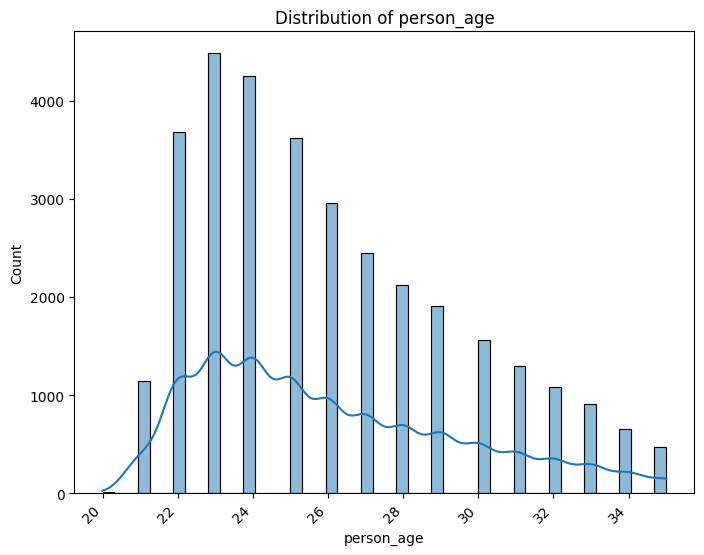

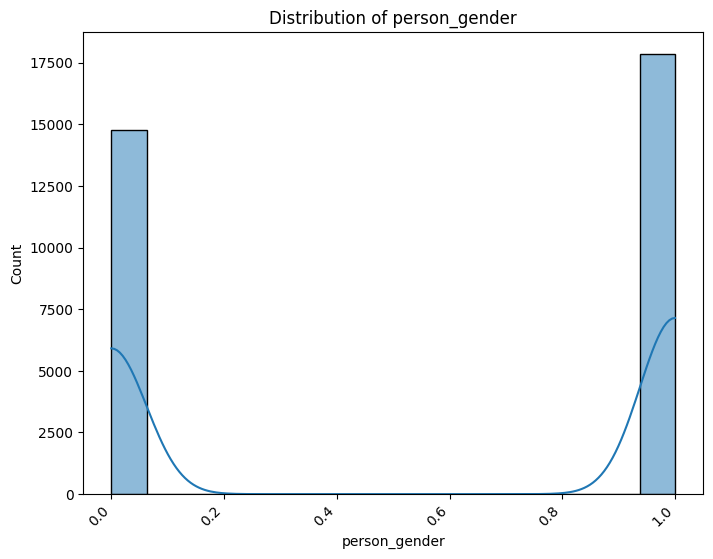

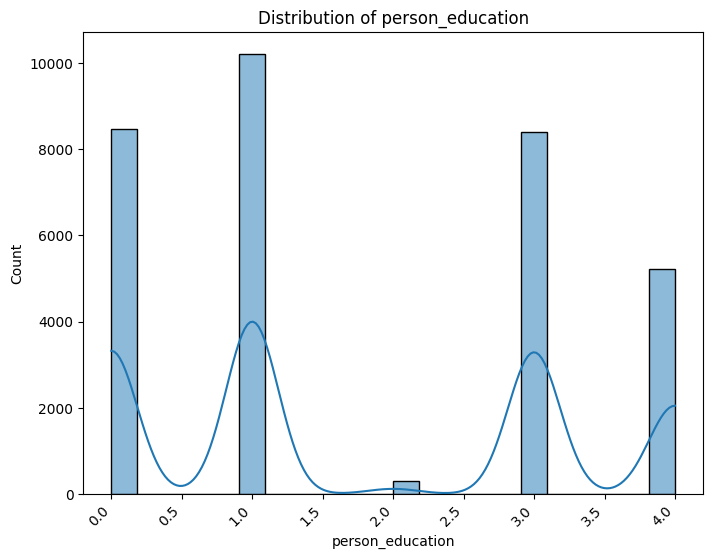

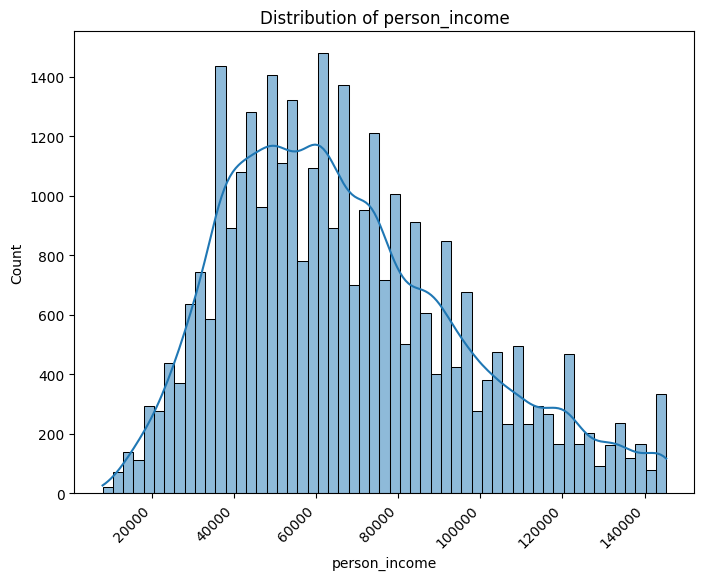

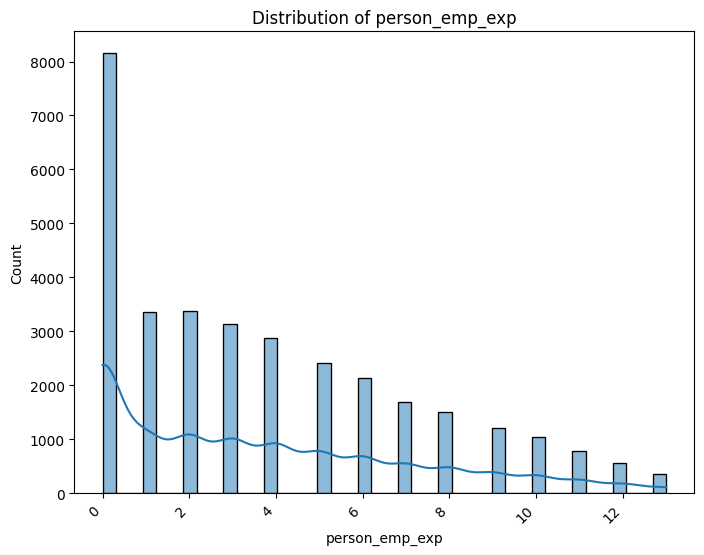

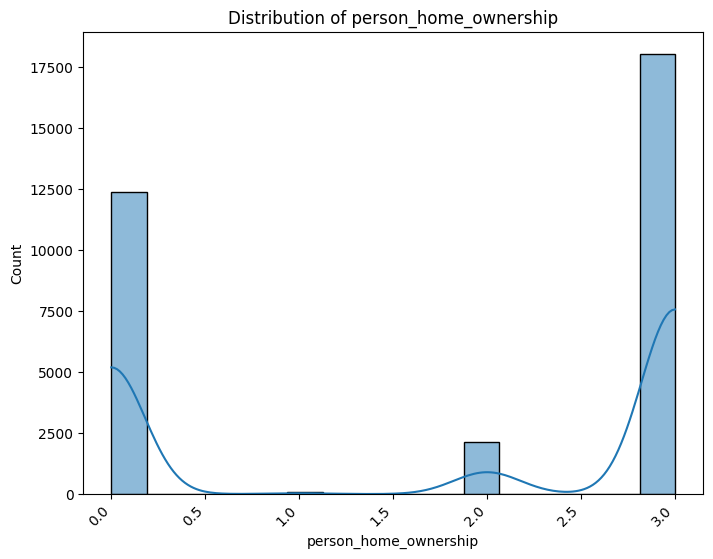

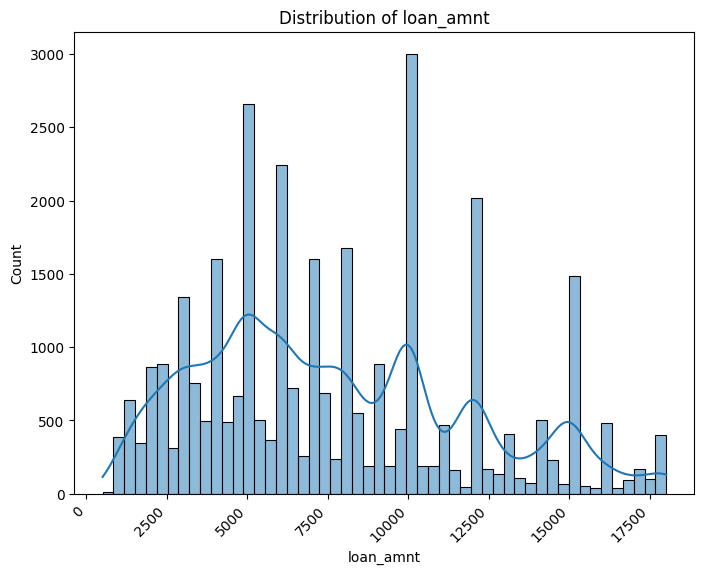

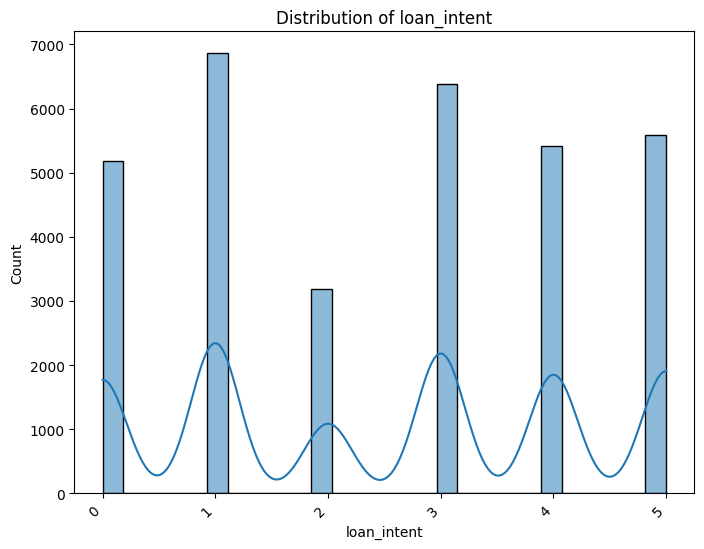

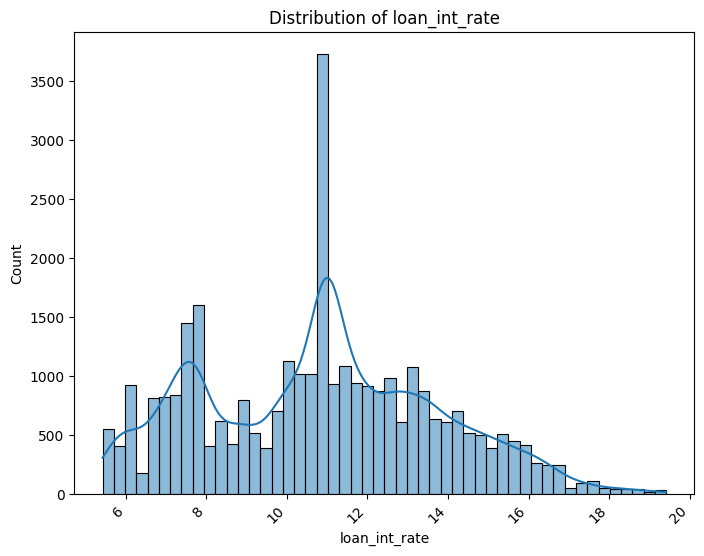

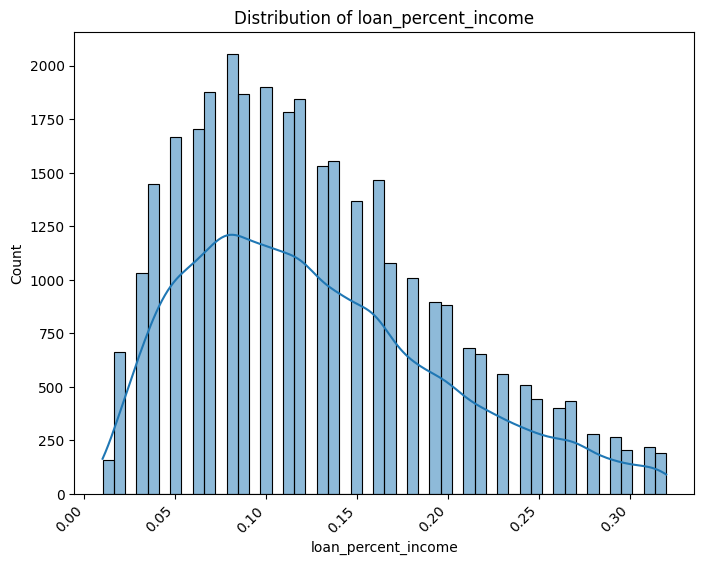

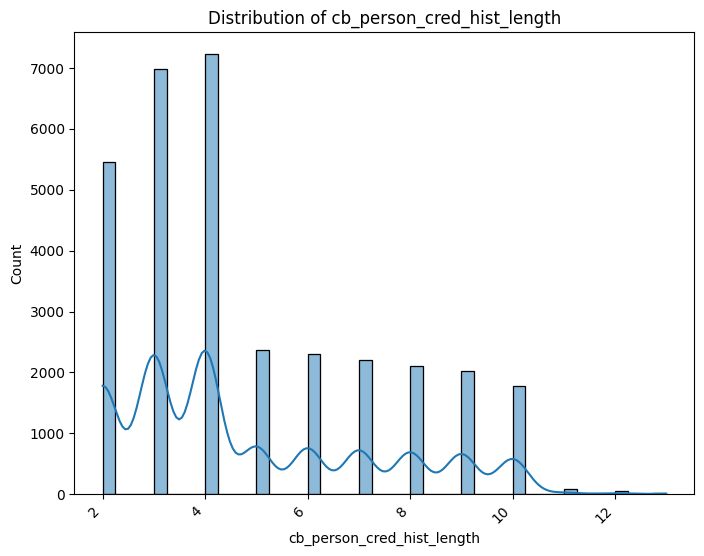

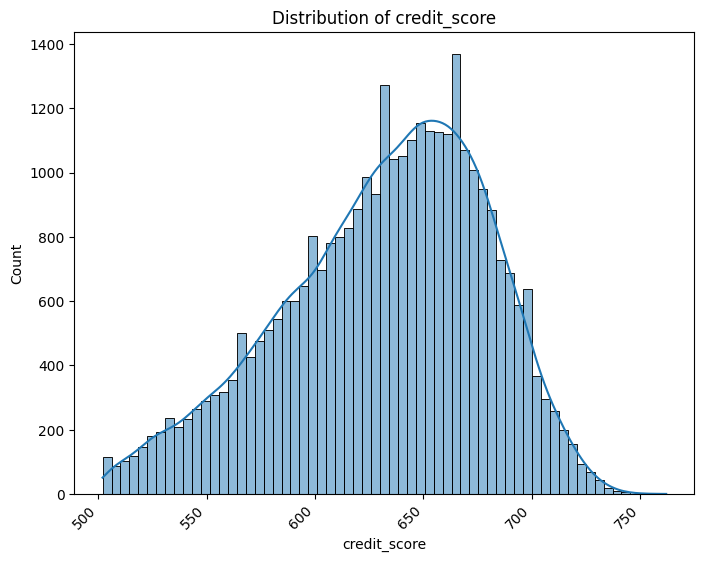

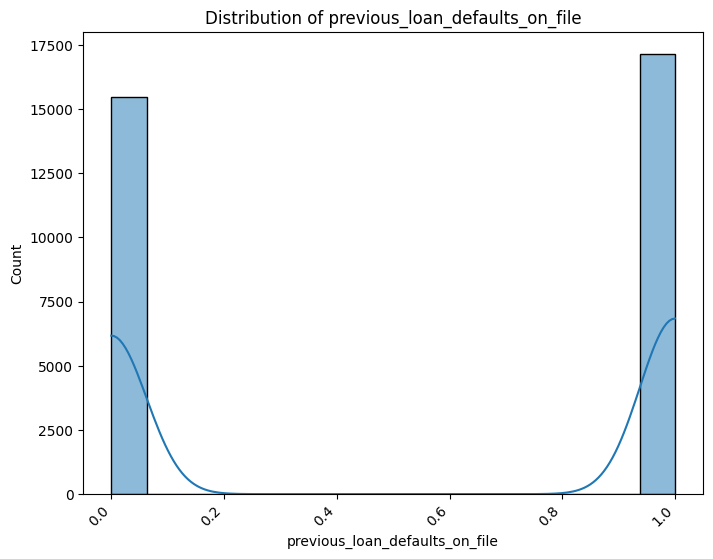

In [23]:
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.show()

### Membangun Model

In [24]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []

# Uji beberapa jumlah cluster
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)


Standarisasi K-Means

In [25]:
from sklearn.decomposition import PCA

# Reduksi dimensi ke 2D
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Jalankan K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

# Tambahkan hasil clustering ke dataframe
df['Cluster'] = kmeans.labels_

# Melihat koefisien (eigenvectors) Menampilkan komponen utama
print("Komponen utama (eigenvectors):")
print(pca.components_)




Komponen utama (eigenvectors):
[[ 0.58831621 -0.01209716 -0.02852172  0.12792835  0.56880616 -0.07243475
   0.03944726  0.0276089  -0.01324747 -0.05857505  0.53624771  0.11938437
   0.00567499]
 [ 0.0536007  -0.00411978 -0.00640307 -0.4215614   0.06092675  0.35689192
   0.30654644  0.00333465  0.28725052  0.62734433  0.06520855  0.07228673
  -0.32975435]]


Menganalisis kontribusi terhadap PC1

In [26]:
# Menampilkan fitur dan kontribusi mereka terhadap PC1
feature_names = df.columns  # Pastikan df berisi nama-nama fitur yang sesuai
component_1_contribution = pca.components_[0]
feature_contribution = dict(zip(feature_names, component_1_contribution))

# Mengurutkan fitur berdasarkan kontribusinya terhadap PC1
sorted_feature_contribution = sorted(feature_contribution.items(), key=lambda x: abs(x[1]), reverse=True)
print("Kontribusi Fitur terhadap PC1:")
for feature, contribution in sorted_feature_contribution:
    print(f"{feature}: {contribution}")

Kontribusi Fitur terhadap PC1:
person_age: 0.588316207785431
person_emp_exp: 0.5688061572487384
cb_person_cred_hist_length: 0.5362477072151627
person_income: 0.1279283545301293
credit_score: 0.11938437191568126
person_home_ownership: -0.07243475292341131
loan_percent_income: -0.05857505309810796
loan_amnt: 0.039447264958565265
person_education: -0.028521720949267082
loan_intent: 0.027608903313463013
loan_int_rate: -0.013247471671161692
person_gender: -0.01209716262558913
previous_loan_defaults_on_file: 0.005674992714080467


Rata-rata fitur di setiap cluster

In [27]:
# Tambahkan hasil clustering ke dataframe
df['Cluster'] = kmeans.labels_

# Hitung rata-rata fitur di setiap cluster
cluster_summary = df.groupby('Cluster').mean()
print("Summary Statistik per Cluster:")
print(cluster_summary)


Summary Statistik per Cluster:
         person_age  person_gender  person_education  person_income  \
Cluster                                                               
0         24.266121       0.552804          1.777048   86433.568091   
1         23.839372       0.551891          1.778165   50987.096408   
2         30.188072       0.536961          1.678925   68732.474613   

         person_emp_exp  person_home_ownership    loan_amnt  loan_intent  \
Cluster                                                                    
0              1.985682               0.490903  8150.482076     2.524922   
1              1.675176               2.751130  7258.617855     2.445572   
2              7.613216               1.789714  7809.364850     2.582229   

         loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
Cluster                                                                   
0             9.865269             0.099397                    3.432878   
1      

Visualisasi hasil clustering

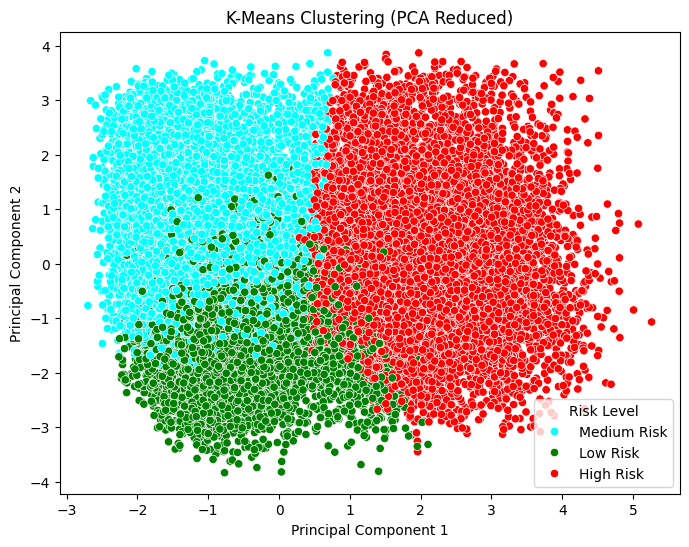

In [28]:
# Membuat mapping untuk keterangan risiko
risk_mapping = {0: 'Low Risk', 1: 'Medium Risk', 2: 'High Risk'}

# Mengganti warna untuk setiap kategori secara manual
custom_palette = {'Low Risk': 'green', 'Medium Risk': 'cyan', 'High Risk': 'red'}

# Mengganti nilai cluster dengan label risiko
df['Risk Level'] = df['Cluster'].map(risk_mapping)

# Visualisasi hasil clustering
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=df['Risk Level'], palette=custom_palette)

# Menambahkan judul dan label
plt.title('K-Means Clustering (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Menambahkan keterangan legend
plt.legend(title='Risk Level')

# Menampilkan plot
plt.show()

Visualisasi Distribusi Data (Pie Chart)

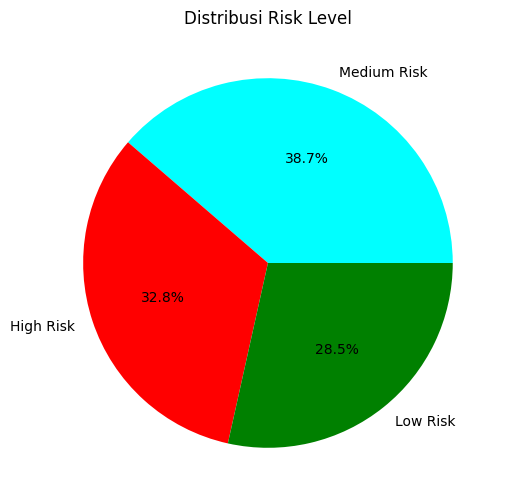

In [29]:
import matplotlib.pyplot as plt

# Menghitung distribusi risiko
risk_counts = df['Risk Level'].value_counts()

# Definisikan warna yang sesuai dengan kategori risiko
custom_colors = ['cyan', 'red', 'green']

# Visualisasi distribusi dengan pie chart
plt.figure(figsize=(8, 6))
plt.pie(risk_counts, labels=risk_counts.index, autopct='%1.1f%%', colors=custom_colors)

# Menambahkan judul
plt.title('Distribusi Risk Level')

# Menampilkan plot
plt.show()


Mengetahui Centroid

Centroid dari setiap cluster:
[[-0.50974365  0.01068722  0.02062427  0.67935613 -0.49653612 -0.91318664
   0.11419744  0.00710888 -0.32967288 -0.39353471 -0.55650984 -0.10948268
   0.26928478]
 [-0.63090158  0.00959384  0.02276156 -0.55446292 -0.58455094  0.67411685
  -0.10795573 -0.0388684   0.21956826  0.31929007 -0.59890554 -0.07554194
  -0.17927206]
 [ 1.18479574 -0.0205633  -0.04468259  0.06333622  1.11878068 -0.00134137
   0.02801129  0.0395844   0.02752678 -0.03445625  1.18770137  0.18388933
  -0.0225747 ]]


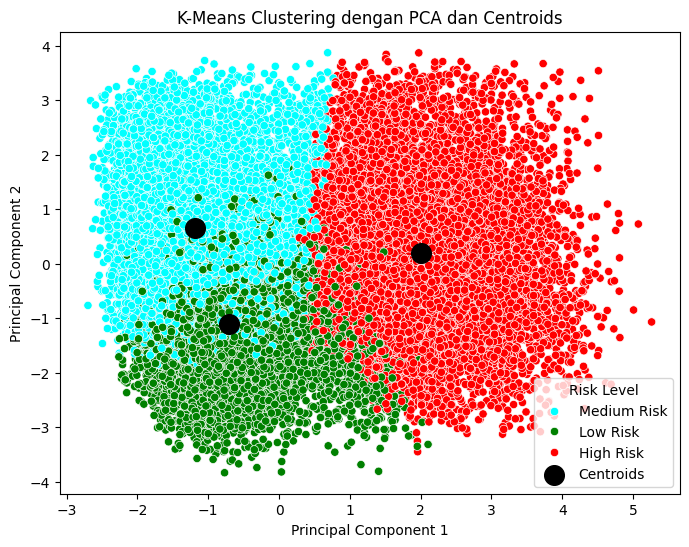

In [30]:
from sklearn.cluster import KMeans

# Misalkan scaled_data adalah data yang sudah diskalakan
kmeans = KMeans(n_clusters=3, random_state=42)

# Latih model K-Means
kmeans.fit(scaled_data)

# Akses centroid dari setiap cluster
centroids = kmeans.cluster_centers_

# Menampilkan centroid
print("Centroid dari setiap cluster:")
print(centroids)

import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi hasil clustering dengan PCA data
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=df['Risk Level'], palette=custom_palette)

# Menambahkan centroid ke plot
centroids_pca = pca.transform(kmeans.cluster_centers_)  # Proyeksikan centroid ke ruang 2D (PCA)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], marker='o', s=200, c='black', label='Centroids')

# Menambahkan keterangan legend
plt.legend(title='Risk Level')

# Menambahkan judul dan label
plt.title('K-Means Clustering dengan PCA dan Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.show()


Pengujian model

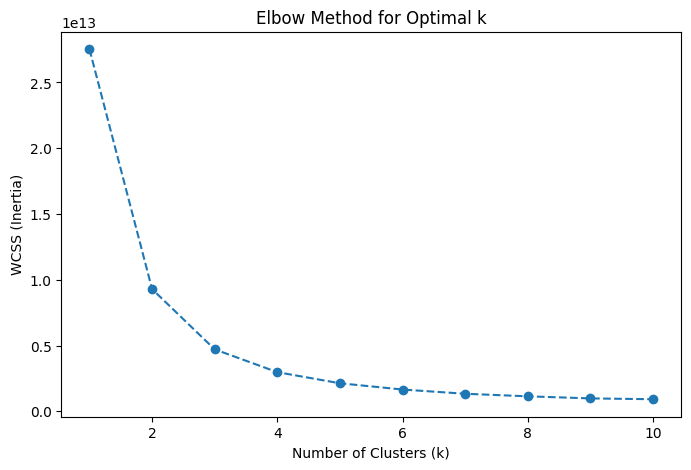

In [31]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.show()


dari Elbow Method ditentukan bahwa k = 3 adalah jumlah cluster yang optimal, maka kesimpulannya adalah: Data Terbagi Menjadi 3 Kelompok yang Berbeda sesuai dengan pembagian di awal, Setiap cluster mewakili kelompok dengan karakteristik berbeda. Berdasarkan analisis sebelumnya
- 0: 'Low Risk',
- 1: 'Medium Risk',
- 2: 'High Risk'

### Logistic Regression

In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [33]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Risk_Level'] = kmeans.fit_predict(scaled_data)


In [34]:
# Split data 80% untuk training, 20% untuk testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [35]:
# Inisialisasi Logistic Regression
logreg = LogisticRegression(random_state=42)

# Melatih model
logreg.fit(X_train, y_train)

# Probabilitas Prediksi
y_probs = logreg.predict_proba(X_test)

# Probabilitas prediksi saat ini
y_probs_df = pd.DataFrame(y_probs, columns=logreg.classes_)

# Hitung rata-rata probabilitas dari semua data
medium_risk_mean = y_probs_df.mean(axis=1)

# Tambahkan kolom "Medium Risk" dengan nilai rata-rata
y_probs_df['Medium Risk'] = medium_risk_mean

# Urutkan kolom menjadi Low Risk, Medium Risk, High Risk
# Jika Low Risk dan High Risk sudah ada, tambahkan Medium Risk di antara keduanya
all_classes = ['Low Risk', 'Medium Risk', 'High Risk']
for col in all_classes:
    if col not in y_probs_df.columns:
        y_probs_df[col] = 0  # Tambahkan jika kolom tidak ada

y_probs_df = y_probs_df[all_classes]

# Tampilkan hasil
print(y_probs_df.head())


   Low Risk  Medium Risk  High Risk
0         0          0.5          0
1         0          0.5          0
2         0          0.5          0
3         0          0.5          0
4         0          0.5          0


c:\Users\ACER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
# Validasi bahwa setiap baris memiliki probabilitas
print(y_probs_df.sum(axis=1).head())


0    0.5
1    0.5
2    0.5
3    0.5
4    0.5
dtype: float64


In [37]:
y_probs_df = y_probs_df.div(y_probs_df.sum(axis=1), axis=0)


<Figure size 800x600 with 0 Axes>

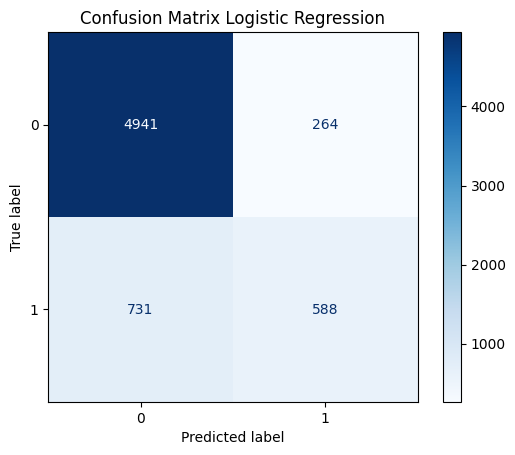

In [38]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Konversi probabilitas ke label kelas (prediksi akhir)
y_pred = logreg.predict(X_test)  # Menghasilkan label kelas diskret

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=logreg.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix Logistic Regression')
plt.show()


In [39]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

# Binarisasi target
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])

# Hitung ROC AUC sebelum tuning
roc_auc = roc_auc_score(y_test_binarized, y_probs, multi_class='ovr', average='macro')

print(f"ROC AUC: {roc_auc:.2f}")


ROC AUC: 0.86


In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Definisi parameter grid untuk tuning
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'lbfgs'],  # Solver
    'max_iter': [100, 200, 300]  # Maximum number of iterations
}

# Inisiasi model logistic regression
logreg = LogisticRegression(multi_class='ovr')

# GridSearchCV
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='roc_auc_ovr', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Model terbaik
best_model = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")



Fitting 5 folds for each of 30 candidates, totalling 150 fits

c:\Users\ACER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Best Parameters: {'C': 10, 'max_iter': 300, 'solver': 'lbfgs'}


c:\Users\ACER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [41]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

# Prediksi probabilitas dengan model terbaik
y_probs_tuned = best_model.predict_proba(X_test)

# Binarisasi target untuk ROC AUC
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])

# Hitung ROC AUC untuk model setelah tuning
roc_auc_tuned = roc_auc_score(y_test_binarized, y_probs_tuned, multi_class='ovr', average='macro')

print(f"ROC AUC (setelah tuning): {roc_auc_tuned:.2f}")


ROC AUC (setelah tuning): 0.93


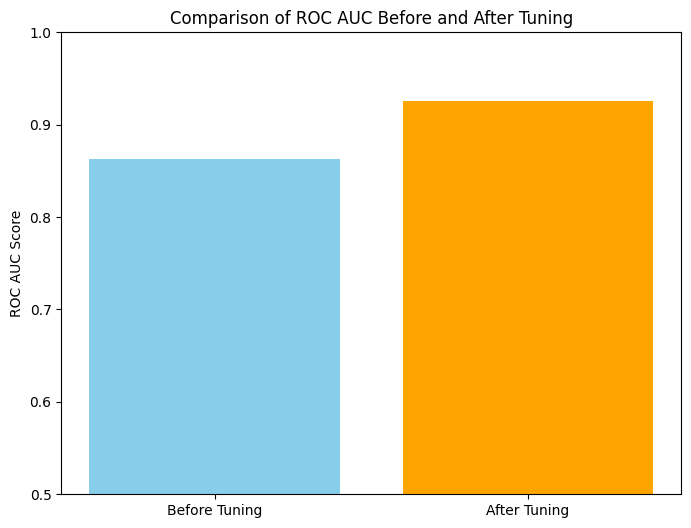

In [42]:
import matplotlib.pyplot as plt

# Nilai ROC AUC sebelum dan setelah tuning
roc_auc_scores = [roc_auc, roc_auc_tuned]
labels = ['Before Tuning', 'After Tuning']

# Visualisasi
plt.figure(figsize=(8, 6))
plt.bar(labels, roc_auc_scores, color=['skyblue', 'orange'])
plt.ylim(0.5, 1.0)  # Rentang nilai ROC AUC
plt.ylabel('ROC AUC Score')
plt.title('Comparison of ROC AUC Before and After Tuning')
plt.show()


In [43]:
import pickle

with open('model.pkl', 'wb') as f:
    pickle.dump(kmeans, f)

In [44]:
with open("model.pkl", "rb") as f:
    loaded_model = pickle.load(f)

In [45]:
!ngrok config add-authtoken 2pgSjnNuMUujyFNQdzFPOYb0tQE_6HAM61rxJtzfbphgpMbGu

Authtoken saved to configuration file: C:\Users\ACER\AppData\Local/ngrok/ngrok.yml


Tampilan Dashboard

In [46]:
# dashboard.py

import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.model_selection import GridSearchCV

# Function for K-Means Clustering Visualization
def kmeans_visualization(df):
    st.subheader("K-Means Clustering")
    numerical_cols = df.select_dtypes(include='number').columns
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df[numerical_cols])

    # PCA for Dimensionality Reduction
    pca = PCA(n_components=2)
    pca_data = pca.fit_transform(scaled_data)

    # K-Means Clustering
    kmeans = KMeans(n_clusters=3, random_state=42)
    df['Cluster'] = kmeans.fit_predict(scaled_data)

    # Map Risk Levels
    risk_mapping = {0: 'Low Risk', 1: 'Medium Risk', 2: 'High Risk'}
    df['Risk Level'] = df['Cluster'].map(risk_mapping)

    # Visualization
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=df['Risk Level'], palette={'Low Risk': 'green', 'Medium Risk': 'cyan', 'High Risk': 'red'})
    plt.title('K-Means Clustering with PCA')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    st.pyplot(plt)

# Function for Logistic Regression Visualization
def logistic_regression_visualization(df):
    st.subheader("Logistic Regression")
    if 'loan_status' not in df.columns:
        st.error("Column 'loan_status' is required.")
        return

    # Encode Categorical Data
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
    numerical_cols = df.select_dtypes(include='number').drop('loan_status', axis=1).columns

    # Data Preparation
    scaler = StandardScaler()
    X = scaler.fit_transform(df[numerical_cols])
    y = df['loan_status']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train Logistic Regression
    logreg = LogisticRegression(random_state=42)
    logreg.fit(X_train, y_train)

    # Confusion Matrix
    y_pred = logreg.predict(X_test)
    conf_matrix = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=logreg.classes_)
    disp.plot(cmap='Blues', values_format='d')
    plt.title('Confusion Matrix')
    st.pyplot(plt)

# Function for ROC AUC Analysis
def roc_auc_visualization(df):
    st.subheader("ROC AUC Analysis")
    if 'loan_status' not in df.columns:
        st.error("Column 'loan_status' is required.")
        return

    # Encode Categorical Data
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
    numerical_cols = df.select_dtypes(include='number').drop('loan_status', axis=1).columns

    # Data Preparation
    scaler = StandardScaler()
    X = scaler.fit_transform(df[numerical_cols])
    y = df['loan_status']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train Logistic Regression
    logreg = LogisticRegression(random_state=42)
    logreg.fit(X_train, y_train)

    # ROC AUC Score
    y_probs = logreg.predict_proba(X_test)
    roc_auc = roc_auc_score(label_binarize(y_test, classes=sorted(y.unique())), y_probs, multi_class='ovr', average='macro')
    st.write(f"ROC AUC Score: {roc_auc:.2f}")

# Main Function
def main():
    st.title("Data Analysis Dashboard")
    st.sidebar.title("Menu")
    analysis_type = st.sidebar.radio("Choose Analysis", ["K-Means Clustering", "Logistic Regression", "ROC AUC Analysis"])

    # Upload Dataset
    uploaded_file = st.sidebar.file_uploader("Upload Dataset", type=["csv"])
    if uploaded_file:
        df = pd.read_csv(uploaded_file)
        st.dataframe(df.head())

        # Execute Analysis
        if analysis_type == "K-Means Clustering":
            kmeans_visualization(df)
        elif analysis_type == "Logistic Regression":
            logistic_regression_visualization(df)
        elif analysis_type == "ROC AUC Analysis":
            roc_auc_visualization(df)
    else:
        st.write("Please upload a dataset.")

if __name__ == '__main__':
    main()


2024-12-27 19:29:04.942 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-27 19:29:05.646 
  command:

    streamlit run C:\Users\ACER\AppData\Roaming\Python\Python313\site-packages\ipykernel_launcher.py [ARGUMENTS]
2024-12-27 19:29:05.647 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-27 19:29:05.648 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-27 19:29:05.648 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-27 19:29:05.649 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-27 19:29:05.649 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-27 19:29:05.650 Threa

In [47]:

from pyngrok import ngrok
import threading
import os

In [48]:
def run_streamlit():
    os.system("streamlit run dashboard.py --server.port 8080")
    
    
thread = threading.Thread(target=run_streamlit)
thread.start()

public_url = ngrok.connect(addr="8080")
print(f"Streamlit app is live at: {public_url}")

Streamlit app is live at: NgrokTunnel: "https://1fe9-36-85-230-34.ngrok-free.app" -> "http://localhost:8080"


In [49]:
# import pandas as pd
# import numpy as np
# import pickle
# import streamlit as st
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler, LabelEncoder
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
# from sklearn.cluster import KMeans
# from sklearn.decomposition import PCA
# import matplotlib.pyplot as plt
# import seaborn as sns

# pickle_in = open("model.pkl", "rb")
# classifier = pickle.load(pickle_in)

# # Fungsi untuk analisis regresi logistik
# def logistic_regression_analysis(df):
#     st.subheader("Analisis Regresi Logistik")

#     # Preprocessing data
#     categorical_cols = ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']
#     le = LabelEncoder()

#     for col in categorical_cols:
#         df[col] = df[col].astype(str)
#         df[col] = le.fit_transform(df[col])

#     X = df.drop('loan_status', axis=1)
#     y = df['loan_status']

#     # Pastikan y adalah 1D array
#     if len(y.shape) > 1:
#         y = y.iloc[:, 0]

#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#     # Model Logistic Regression
#     logreg = LogisticRegression(random_state=42)
#     logreg.fit(X_train, y_train)

#     # Prediksi dan evaluasi
#     y_pred = logreg.predict(X_test)
#     st.write("**Classification Report:**")
#     st.text(classification_report(y_test, y_pred))

#     # Confusion Matrix
#     cm = confusion_matrix(y_test, y_pred)
#     st.write("**Confusion Matrix:**")
#     st.write(cm)

#     # ROC AUC
#     if len(logreg.classes_) == 2:  # Binary classification
#         y_probs = logreg.predict_proba(X_test)[:, 1]
#         roc_auc = roc_auc_score(y_test, y_probs)
#     else:  # Multi-class classification
#         y_probs = logreg.predict_proba(X_test)
#         roc_auc = roc_auc_score(y_test, y_probs, multi_class='ovr')
#     st.write(f"**ROC AUC Score:** {roc_auc:.2f}")

# # Fungsi untuk klasterisasi menggunakan K-Means
# def kmeans_clustering(df):
#     st.subheader("Analisis Klasterisasi (K-Means)")

#     # Preprocessing data
#     scaler = StandardScaler()
#     scaled_data = scaler.fit_transform(df)

#     # Reduksi dimensi menggunakan PCA
#     pca = PCA(n_components=2)
#     pca_data = pca.fit_transform(scaled_data)

#     # K-Means Clustering
#     kmeans = KMeans(n_clusters=3, random_state=42)
#     df['Cluster'] = kmeans.fit_predict(scaled_data)

#     # Mapping risiko untuk visualisasi
#     risk_mapping = {0: 'Low Risk', 1: 'Medium Risk', 2: 'High Risk'}
#     df['Risk Level'] = df['Cluster'].map(risk_mapping)

#     # Visualisasi hasil klustering
#     st.write("### Visualisasi Klaster")
#     plt.figure(figsize=(8, 6))
#     sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=df['Risk Level'], palette={'Low Risk': 'green', 'Medium Risk': 'cyan', 'High Risk': 'red'})
#     plt.title('K-Means Clustering (PCA Reduced)')
#     plt.xlabel('Principal Component 1')
#     plt.ylabel('Principal Component 2')
#     st.pyplot(plt)

#     # Visualisasi distribusi klaster
#     st.write("### Distribusi Klaster")
#     risk_counts = df['Risk Level'].value_counts()
#     plt.figure(figsize=(8, 6))
#     plt.pie(risk_counts, labels=risk_counts.index, autopct='%1.1f%%', colors=['green', 'cyan', 'red'])
#     plt.title('Distribusi Risk Level')
#     st.pyplot(plt)

# # Fungsi utama aplikasi
# def main():
#     st.title("Dashboard Analisis Data")

#     # Sidebar untuk memilih analisis
#     st.sidebar.title("Pilih Metode Analisis")
#     option = st.sidebar.selectbox("Metode:", ["Regresi Logistik", "Klasterisasi"])

#     # Load dataset
#     df = pd.read_csv("loan_data.csv")

#     if option == "Regresi Logistik":
#         logistic_regression_analysis(df)
#     elif option == "Klasterisasi":
#         kmeans_clustering(df)

# if __name__ == '__main__':
#     main()
